For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights

In [3]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

### Ridge Regularization

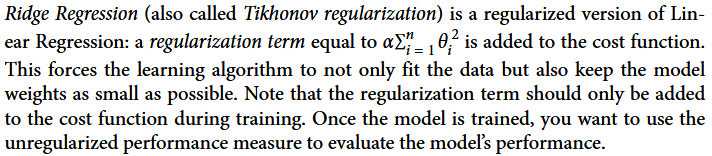

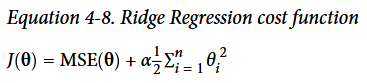

there are two ways to apply ridge regression, 
<br>1. closed form equation<br>2. Performing gradient descent

##### Closed form equation

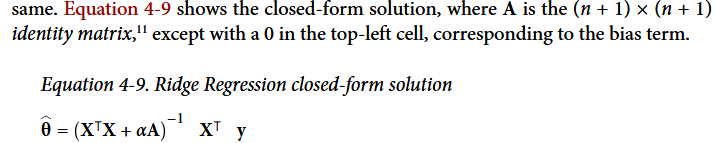

In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1, solver = "cholesky")
ridge.fit(X, y)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'cholesky'
,positive,False
,random_state,None


The solver here is a variant of Equation 4-9 that uses a matrix factorization technique by André-
Louis Cholesky

In [7]:
ridge.predict([[1.5]])

array([5.17720985])

And by using Stochastic Gradient descent

In [10]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='l2').fit(X,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
sgd.predict([[1.5]])

array([5.17782799])

How ridge regression reduce weights<br><br>
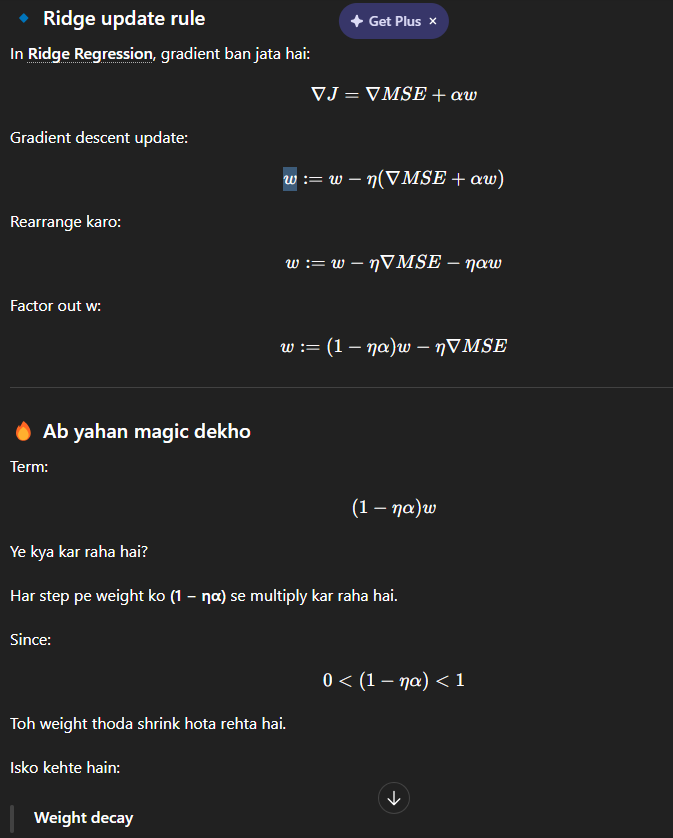

### Lasso Regression

Main point: Used for feature selection

An important characteristic of Lasso Regression is that it tends to eliminate the
weights of the least important features (i.e., set them to zero)

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha =  0.1)
lasso.fit(X,y)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [13]:
lasso.predict([[1.5]])

array([5.1305149])

### Elastic net

Elastic net is a middle ground in between both odf the reguylarization techniques


In [14]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)

In [15]:
elastic_net.fit(X,y)

,alpha,0.5
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [16]:
elastic_net.predict([[1.5]])

array([4.9197234])

### Eqarly stopping

The process of choosing the model and stoppping and iterative process to find the best one such as by using gradient descent is called Early Stopping

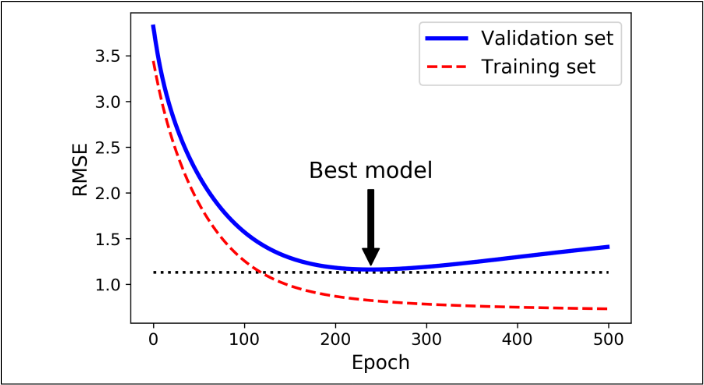

Implementation of early stopping

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [25]:
poly_pipe = Pipeline([
    ("poly-reg", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [39]:
X_train_poly = poly_pipe.fit_transform(X_train)
X_test_poly = poly_pipe.transform(X_test)

sgd = SGDRegressor(max_iter=1, tol=None, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)

In [40]:
minimum_val_error = float("inf")

In [41]:
best_model = None
best_epoch = None

In [42]:
from sklearn.metrics import mean_squared_error
for epoch in range(1000):
    sgd.fit(X_train_poly, y_train) # continues where it left off
    y_val_predict = sgd.predict(X_test_poly)
    val_error = mean_squared_error(y_val_predict, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConve